### np-bragg
The goal here is to implement a very simple, monochromatic version of nanobragg in numpy as a proof of concept. The inputs required will be structure factors, an A matrix, and a reciprocal lattice point size. The user will also supply the $S_1$ vectors for every pixel.

The way it will work, is that we calculate the location in reciprocal space where each S1 vector crosses the ewald sphere. 
Then we will approximate the scattering cross section of that pixel by summing the contributions from every reflection. 
$r_h  = hA^{-1}$

$$I_p = \sum_h F_h e^{\big(\frac {S1_p - r_h}{r_s}\big)^2}  $$

In [169]:
%pylab inline
import tensorflow as tf

wavelength = 1.
pixels = 200 #number of pixels on each axis
pixelsize = .1 #mm
hmax = 10
detector_distance = 50
Rs = 0.005

detector_ori = np.array([
    -pixels*pixelsize/2,
    -pixels*pixelsize/2,
    detector_distance,
])

fast_axis = np.array([1, 0, 0])
slow_axis = np.array([0, 1, 0])

A = np.array([
    [30., 0., 0.],
    [ 0.,40., 0.],
    [ 0., 0.,30.],
])

from scipy.stats import special_ortho_group
A = np.matmul(special_ortho_group.rvs(3), A)

H = np.array(np.meshgrid(np.arange(-hmax, hmax), np.arange(-hmax, hmax), np.arange(-hmax, hmax))).reshape((3, 8*hmax**3))
#H[:,H.sum(0) != 0] #No 0,0,0 reflection

Rh = np.matmul(H.T, np.linalg.inv(A)) + [0, 0, 1/wavelength]
I = np.sqrt(-np.log(np.random.random(len(H.T))))

Populating the interactive namespace from numpy and matplotlib


In [170]:
P = np.array(np.meshgrid(
    np.arange(pixels),
    np.arange(pixels)
)).reshape((2, pixels**2))

P.shape

detector_basis = np.vstack((fast_axis, slow_axis))

Rp = np.matmul(P.T, pixelsize*detector_basis) + detector_ori
S1 = Rp/np.linalg.norm(Rp, 2, 1)[:,None]/wavelength


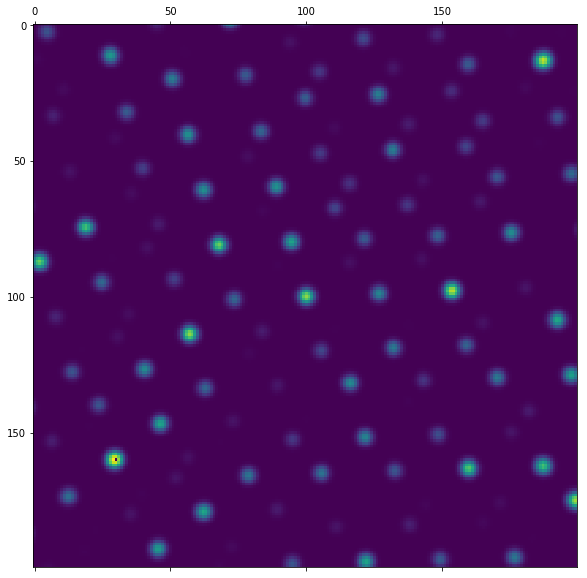

In [171]:
image = np.matmul(I, np.exp(-np.square(np.linalg.norm(S1 - Rh[:,None,:], 2, -1)/Rs))).reshape((pixels, pixels))
image[image==image.max()] = 0.

f = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.matshow(np.log(1+image))